 ## Model creating for Telecom Company

This project was completed during Yandex.Practicum Data Science professional program.



### Project's goal : prediction of customer churn



### Content

1. [General information about data](#start)
2. [Data Preprocessing and Analysis](#1)
3. [Models training](#2)
4. [Testing](#3)
5. [Results](#4)
6. [Conclusion](#4)

### Data information:
- 4 datasets (contract, internet,personal,phone).
- Target: Column 'EndDate' is 'No'.
- Data were downloaded 2020-02-01 

 <a id="start"></a>
### *General information about data*

In [1]:
import pandas as pd
import plotly.express as px
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score, roc_curve, roc_auc_score,mean_squared_error, mean_absolute_error 
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.utils import shuffle
import warnings
import sklearn.exceptions
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats as st
from math import ceil
from numpy.random import RandomState
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier

In [2]:
contract=pd.read_csv('contract.csv')
internet=pd.read_csv('internet.csv')
personal=pd.read_csv('personal.csv')
phone=pd.read_csv('phone.csv')

In [3]:
display(contract.head(5), contract.describe())
display(contract.info())
display(contract.isna().mean())  

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

customerID          0.0
BeginDate           0.0
EndDate             0.0
Type                0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
dtype: float64

In [4]:
display(internet.head(5), internet.describe())
display(internet.info())
display(internet.isna().mean())  

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,2773-MADBQ,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

customerID          0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
dtype: float64

In [5]:
display(personal.head(5), personal.describe())
display(personal.info())
display(personal.isna().mean())  

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

customerID       0.0
gender           0.0
SeniorCitizen    0.0
Partner          0.0
Dependents       0.0
dtype: float64

In [6]:
display(phone.head(5), phone.describe())
display(phone.info())
display(phone.isna().mean())  

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,6734-CKRSM,No
freq,1,3390


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

customerID       0.0
MultipleLines    0.0
dtype: float64

### Conclusion
 We've viewed data, it requires some preprocessing

<a id="1"></a>
### *Data Preprocessing and Analysis*

As we can see, some tables are shorter than others. Empty values may appear.

In [7]:
first = contract.merge(internet, on='customerID', how='outer') 
second=first.merge(personal, on='customerID', how='outer') 
df=second.merge(phone, on='customerID', how='outer') 

We have combined all tables in one.

In [8]:
df

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5,DSL,Yes,No,Yes,Yes,Yes,Yes,Male,0,Yes,Yes,Yes
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9,Fiber optic,No,Yes,Yes,No,Yes,Yes,Female,0,Yes,Yes,Yes
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,DSL,Yes,No,No,No,No,No,Female,0,Yes,Yes,NaN
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6,Fiber optic,No,No,No,No,No,No,Male,1,Yes,No,Yes


Lets see 'MonthlyCharges' graph 

<AxesSubplot:>

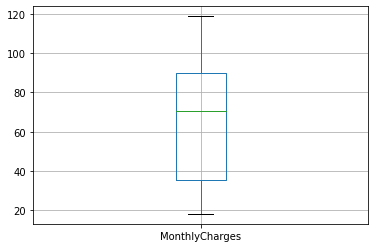

In [9]:
contract.boxplot(column='MonthlyCharges')

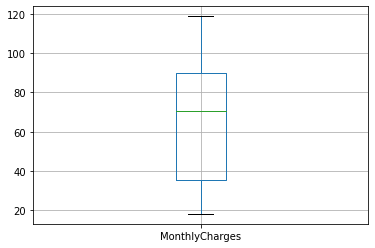

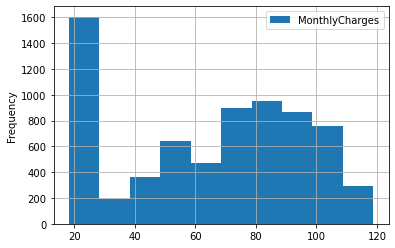

In [10]:
contract.plot(kind='hist', y='MonthlyCharges', bins=10,label='MonthlyCharges', grid=True, legend=True)
plt.show()

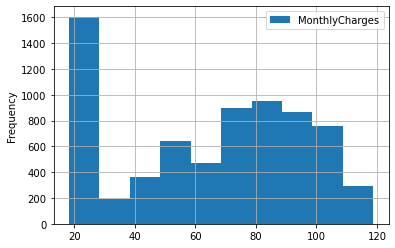

Lets see 'TotalCharges' graph. Before this, we should transform the type of data on numeric. 

In [11]:
df[df['TotalCharges'] == '0']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines


In [12]:
def change_type(data):
    try:
        data= pd.to_numeric(data)
    except:
        data=0
    return data

In [13]:
contract['TotalCharges'] = contract['TotalCharges'].apply(change_type)

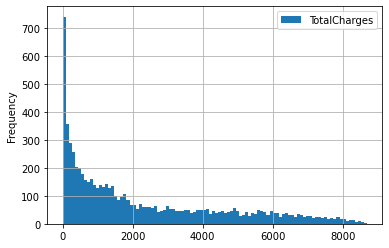

In [14]:
contract.plot(kind='hist', y='TotalCharges', bins=100,label='TotalCharges', grid=True, legend=True)
plt.show()

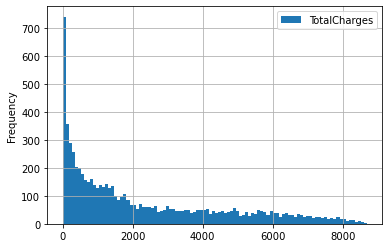


<AxesSubplot:>

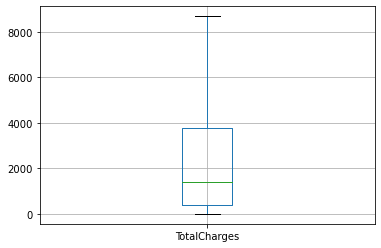

In [15]:
contract.boxplot(column='TotalCharges')

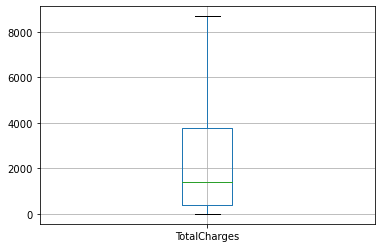

In [16]:
contract.duplicated().sum(),personal.duplicated().sum(), internet.duplicated().sum(),phone.duplicated().sum()


(0, 0, 0, 0)

Duplicates are not found

Let's check the information about  table.

In [17]:
display(df.head(5), df.describe())
display(df.info())
display(df.isna().mean())  

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No


,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000
mean,64.761692,0.162147
std,30.090047,0.368612
min,18.250000,0.000000
25%,35.500000,0.000000
50%,70.350000,0.000000
75%,89.850000,0.000000
max,118.750000,1.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   InternetService   5517 non-null   object 
 9   OnlineSecurity    5517 non-null   object 
 10  OnlineBackup      5517 non-null   object 
 11  DeviceProtection  5517 non-null   object 
 12  TechSupport       5517 non-null   object 
 13  StreamingTV       5517 non-null   object 
 14  StreamingMovies   5517 non-null   object 
 15  gender            7043 non-null   object 
 16  SeniorCitizen     7043 non-null   int64  


None

customerID          0.000000
BeginDate           0.000000
EndDate             0.000000
Type                0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.000000
InternetService     0.216669
OnlineSecurity      0.216669
OnlineBackup        0.216669
DeviceProtection    0.216669
TechSupport         0.216669
StreamingTV         0.216669
StreamingMovies     0.216669
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
MultipleLines       0.096834
dtype: float64

Conclusion: we see some columns exist empties and incorrect type of data. 

In [18]:
df['EndDate'].value_counts()

No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: EndDate, dtype: int64

Let's check 'EndDate' column. As we see, there are 4 dates. Likely, these are dates when data were downloaded.Data were taken for the last 4 months: from October 2019 to January 2020.

In [19]:
df['TotalCharges'] = df['TotalCharges'].apply(change_type)

Let's change 'TotalCharges' column type to numeric.

In [20]:
def target(data):
    if data == 'No':
        data = 1
    else:
        data=0
    return data

In [21]:
df['target'] = df['EndDate'].apply(target)

Create a new column 'target' using 'End Date'. If 'EndDate' is 'No', the contract has not ended.

In [22]:
display(df.info(), df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   float64
 8   InternetService   5517 non-null   object 
 9   OnlineSecurity    5517 non-null   object 
 10  OnlineBackup      5517 non-null   object 
 11  DeviceProtection  5517 non-null   object 
 12  TechSupport       5517 non-null   object 
 13  StreamingTV       5517 non-null   object 
 14  StreamingMovies   5517 non-null   object 
 15  gender            7043 non-null   object 
 16  SeniorCitizen     7043 non-null   int64  


None

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,target
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,...,No,No,No,No,Female,0,Yes,No,NaN,1
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,DSL,Yes,...,Yes,No,No,No,Male,0,No,No,No,1
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,...,No,No,No,No,Male,0,No,No,No,0
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,...,Yes,Yes,No,No,Male,0,No,No,NaN,1
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,...,No,No,No,No,Female,0,No,No,No,0


Let's transform the column with dates in datetime format.

In [23]:
df['BeginDate'] = pd.to_datetime(df['BeginDate'],format='%Y-%m-%d %H:%M:%S')


The "EndDate" column contains 'No' values that may interfere with the conversion. Let's replace them with the date of unloading the database are known - `2020-02-01 00: 00: 00`.

In [24]:
def time_end(data):
    if data == 'No':
        data = '2020-02-01 00:00:00'
    return data

In [25]:
df['EndDate']  = df['EndDate'].apply(time_end) 

In [26]:
df['EndDate'].unique()

array(['2020-02-01 00:00:00', '2019-12-01 00:00:00',
       '2019-11-01 00:00:00', '2019-10-01 00:00:00',
       '2020-01-01 00:00:00'], dtype=object)

In [27]:
df['EndDate'] = pd.to_datetime(df['EndDate'],format='%Y-%m-%d %H:%M:%S')


Let's count the contract time interval from the start date to finish  using unix timestamp format.

In [28]:
def utc(data):
    data = (data - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
    data = data // 86400
    return data

In [29]:
df['end_int'] = df['EndDate'].apply(utc)
df['start_int'] = df['BeginDate'].apply(utc)

In [30]:
df['end_int'].unique()
df['start_int'].max()

18293

Let's create a new data column with the contracts time interval. 

In [31]:
df['contract_time'] = df['end_int'] - df['start_int']

In [32]:
df['contract_time'].min(),df['contract_time'].max()

(0, 2191)

In [33]:
df.corr()

,MonthlyCharges,TotalCharges,SeniorCitizen,target,end_int,start_int,contract_time
MonthlyCharges,1.000000,0.651174,0.220173,-0.193356,-0.181052,-0.260860,0.247754
TotalCharges,0.651174,1.000000,0.103006,0.198324,0.173531,-0.829418,0.826109
SeniorCitizen,0.220173,0.103006,1.000000,-0.150889,-0.128794,-0.023454,0.016514
target,-0.193356,0.198324,-0.150889,1.000000,0.889394,-0.311715,0.352673
end_int,-0.181052,0.173531,-0.128794,0.889394,1.000000,-0.263292,0.310625
start_int,-0.260860,-0.829418,-0.023454,-0.311715,-0.263292,1.000000,-0.998779
contract_time,0.247754,0.826109,0.016514,0.352673,0.310625,-0.998779,1.000000


Let's see a correlation.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   InternetService   5517 non-null   object        
 9   OnlineSecurity    5517 non-null   object        
 10  OnlineBackup      5517 non-null   object        
 11  DeviceProtection  5517 non-null   object        
 12  TechSupport       5517 non-null   object        
 13  StreamingTV       5517 non-null   object        
 14  StreamingMovies   5517 n

Drop unnecessary features.

In [35]:
df= df.drop(columns=['BeginDate','EndDate','customerID','start_int','end_int','PaperlessBilling','PaymentMethod','TotalCharges'],axis=1)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7043 non-null   object 
 1   MonthlyCharges    7043 non-null   float64
 2   InternetService   5517 non-null   object 
 3   OnlineSecurity    5517 non-null   object 
 4   OnlineBackup      5517 non-null   object 
 5   DeviceProtection  5517 non-null   object 
 6   TechSupport       5517 non-null   object 
 7   StreamingTV       5517 non-null   object 
 8   StreamingMovies   5517 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     6361 non-null   object 
 14  target            7043 non-null   int64  
 15  contract_time     7043 non-null   int64  
dtypes: float64(1), int64(3), object(12)
memory

Some columns contain 'Nan'. Lets fill them.

In [37]:
df.head()

,Type,MonthlyCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,target,contract_time
0,Month-to-month,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NaN,1,31
1,One year,56.95,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No,1,1036
2,Month-to-month,53.85,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No,0,61
3,One year,42.30,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,NaN,1,1371
4,Month-to-month,70.70,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No,0,61


In [38]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', nan], dtype=object)

array(['DSL', 'Fiber optic', nan], dtype=object)


In [39]:
df['OnlineSecurity'].unique()

array(['No', 'Yes', nan], dtype=object)

array(['No', 'Yes', nan], dtype=object)


In [40]:
df['MultipleLines'].unique()

array([nan, 'No', 'Yes'], dtype=object)

array([nan, 'No', 'Yes'], dtype=object)


In [41]:
df['InternetService'] = df['InternetService'].fillna('No')
df['OnlineSecurity'] = df['OnlineSecurity'].fillna('No')
df['OnlineBackup'] = df['OnlineBackup'].fillna('No')
df['DeviceProtection'] = df['DeviceProtection'].fillna('No')
df['TechSupport'] = df['TechSupport'].fillna('No')
df['StreamingTV'] = df['StreamingTV'].fillna('No')
df['StreamingMovies'] = df['StreamingMovies'].fillna('No')
df['MultipleLines'] = df['MultipleLines'].fillna('No')


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7043 non-null   object 
 1   MonthlyCharges    7043 non-null   float64
 2   InternetService   7043 non-null   object 
 3   OnlineSecurity    7043 non-null   object 
 4   OnlineBackup      7043 non-null   object 
 5   DeviceProtection  7043 non-null   object 
 6   TechSupport       7043 non-null   object 
 7   StreamingTV       7043 non-null   object 
 8   StreamingMovies   7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  target            7043 non-null   int64  
 15  contract_time     7043 non-null   int64  
dtypes: float64(1), int64(3), object(12)
memory

Transform text and categorical data using OHE.

In [43]:
df = pd.get_dummies(df, drop_first = True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MonthlyCharges               7043 non-null   float64
 1   SeniorCitizen                7043 non-null   int64  
 2   target                       7043 non-null   int64  
 3   contract_time                7043 non-null   int64  
 4   Type_One year                7043 non-null   uint8  
 5   Type_Two year                7043 non-null   uint8  
 6   InternetService_Fiber optic  7043 non-null   uint8  
 7   InternetService_No           7043 non-null   uint8  
 8   OnlineSecurity_Yes           7043 non-null   uint8  
 9   OnlineBackup_Yes             7043 non-null   uint8  
 10  DeviceProtection_Yes         7043 non-null   uint8  
 11  TechSupport_Yes              7043 non-null   uint8  
 12  StreamingTV_Yes              7043 non-null   uint8  
 13  StreamingMovies_Ye

In [45]:
df

,MonthlyCharges,SeniorCitizen,target,contract_time,Type_One year,Type_Two year,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_Yes
0,29.85,0,1,31,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,56.95,0,1,1036,1,0,0,0,1,0,1,0,0,0,1,0,0,0
2,53.85,0,0,61,0,0,0,0,1,1,0,0,0,0,1,0,0,0
3,42.30,0,1,1371,1,0,0,0,1,0,1,1,0,0,1,0,0,0
4,70.70,0,0,61,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,84.80,0,1,730,1,0,0,0,1,0,1,1,1,1,1,1,1,1
7039,103.20,0,1,2191,1,0,1,0,0,1,1,0,1,1,0,1,1,1
7040,29.60,0,1,337,0,0,0,0,1,0,0,0,0,0,0,1,1,0
7041,74.40,1,0,123,0,0,1,0,0,0,0,0,0,0,1,1,0,1


In [46]:
df.columns

Index(['MonthlyCharges', 'SeniorCitizen', 'target', 'contract_time',
       'Type_One year', 'Type_Two year', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'MultipleLines_Yes'],
      dtype='object')

Let's divide the data into 3 samples.

In [47]:

df_all, df_test = train_test_split(df, test_size=0.2, random_state=12345)   

df_all_new = df_all.copy()

target_all = df_all['target']
features_all = df_all.drop('target', axis=1)

features_train, features_valid, target_train, target_valid = train_test_split(
    features_all, target_all, test_size=0.2, random_state=12345, stratify=target_all)

In [48]:
target_test = df_test['target']
features_test = df_test.drop('target', axis=1)

In [49]:
numeric = ['MonthlyCharges','contract_time']

In [50]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_all[numeric] = scaler.transform(features_all[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric]) 
features_test[numeric] = scaler.transform(features_test[numeric])

Scaling data

Let's Look at the 'target'.

In [51]:
df['target'].value_counts()

1    5174
0    1869
Name: target, dtype: int64

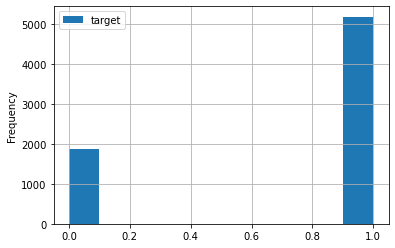

In [52]:
df.plot(kind='hist', y='target', bins=10,label='target', grid=True, legend=True)
plt.show()

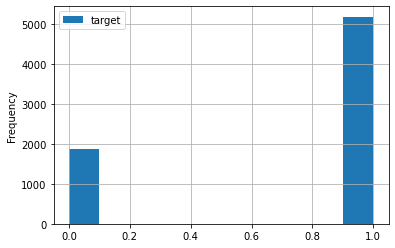

Graph shows imbalance.

<a id="2"></a>

### Models training

#### 1. LogicalRegression

In [53]:
model_log_balance = LogisticRegression(random_state=12345, solver='liblinear', class_weight ='balanced')

model_log_balance.fit(features_train, target_train)
probabilities_valid = model_log_balance.predict_proba(features_valid)[:,1]
auc_roc_log1 = roc_auc_score(target_valid,probabilities_valid)
auc_roc_log1

0.8132969292670882

 ##### `roc-auc =  0.81`


In [54]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_valid)

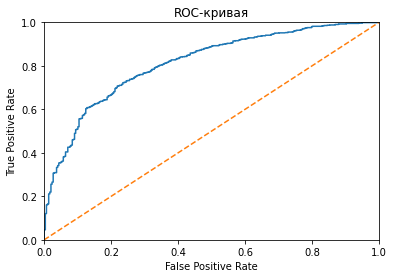

In [55]:
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

### Upsampling

In [56]:
def upsamp(features_first,target_first,repeat):
    features_zeros = features_first[target_first == 0]
    features_ones = features_first[target_first == 1]
    target_zeros = target_first[target_first == 0]
    target_ones = target_first[target_first == 1]

    features_upsampled = pd.concat([features_ones] + [features_zeros] * repeat)
    target_upsampled = pd.concat([target_ones] + [target_zeros] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

In [57]:
features_upsampled, target_upsampled = upsamp(features_train, target_train,3)

In [58]:
target_upsampled.value_counts()

0    3576
1    3315
Name: target, dtype: int64

Increasing the missing class and train the model.

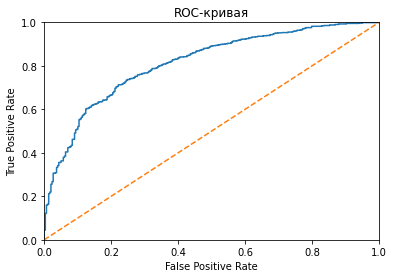

0.8132645461095684

In [59]:
model_log_up = LogisticRegression(random_state=12345, solver='liblinear')

model_log_up.fit(features_upsampled, target_upsampled)
probabilities_valid_log_up = model_log_up.predict_proba(features_valid)[:,1]
auc_roc_log_up = roc_auc_score(target_valid,probabilities_valid_log_up)

fpr_up, tpr_up, thresholds_up = roc_curve(target_valid, probabilities_valid_log_up)

plt.figure()
plt.plot(fpr_up,tpr_up)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()


auc_roc_log_up

 ##### `roc-auc =  0.81`

### Downsample

In [60]:
def downsampl(features_first,target_first,fraction):
    features_zeros = features_first[target_first == 0]
    features_ones = features_first[target_first == 1]
    target_zeros = target_first[target_first == 0]
    target_ones = target_first[target_first == 1]

    features_downsampled = pd.concat(
        [features_ones.sample(frac=fraction, random_state=12345)] + [features_zeros])
    target_downsampled = pd.concat(
        [target_ones.sample(frac=fraction, random_state=12345)] + [target_zeros])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

In [61]:
features_downsampled, target_downsampled = downsampl(features_train, target_train,0.35)

In [62]:
target_downsampled.value_counts()

0    1192
1    1160
Name: target, dtype: int64

Обучим модель после уменьшения класса

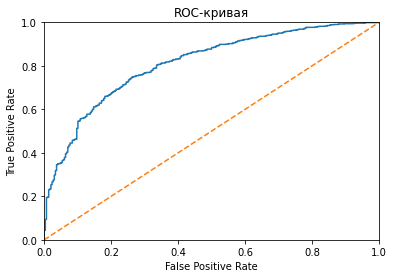

0.811754681390209

In [63]:
model_log_down = LogisticRegression(random_state=12345, solver='liblinear')

model_log_down.fit(features_downsampled,target_downsampled)
probabilities_valid_log_down = model_log_down.predict_proba(features_valid)[:,1]
auc_roc_log_down = roc_auc_score(target_valid,probabilities_valid_log_down)

fpr_down, tpr_down, thresholds_down = roc_curve(target_valid, probabilities_valid_log_down)

plt.figure()
plt.plot(fpr_down,tpr_down)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()


auc_roc_log_down

 ##### `roc-auc = 0.81`

### 2 DecisionTree

#### Balanced

In [64]:
tree_b = DecisionTreeClassifier(random_state=12345,class_weight = 'balanced')
grid = {'max_depth': range (1, 50, 1),
       'min_samples_leaf': range(2, 10, 1),
        'max_features' : np.arange (.1,1,.1),
        'min_samples_split': np.arange (.1,1,.1)
       }
tree_rs = RandomizedSearchCV(tree_b, n_jobs=4, n_iter=50, cv=5,
                                 param_distributions=grid, random_state=12345, scoring='roc_auc')
tree_rs.fit(features_train, target_train)
print(tree_rs.best_params_)

{'min_samples_split': 0.1, 'min_samples_leaf': 2, 'max_features': 0.6, 'max_depth': 43}


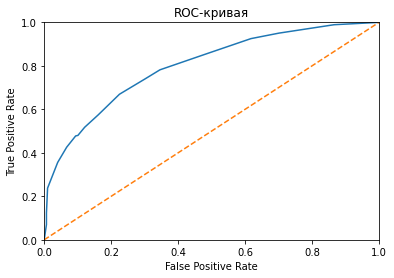

0.7985929518057658

In [65]:
tree_balanced = DecisionTreeClassifier(random_state=12345, max_depth=45, class_weight = 'balanced',
                                min_samples_leaf=3, max_features=0.8, min_samples_split=0.1)

tree_balanced.fit(features_train, target_train)
probabilities_valid_dec = tree_balanced.predict_proba(features_valid)[:,1]
auc_roc_dec = roc_auc_score(target_valid,probabilities_valid_dec)

fpr_dec, tpr_dec, thresholds_down = roc_curve(target_valid, probabilities_valid_dec)

plt.figure()
plt.plot(fpr_dec,tpr_dec)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()


auc_roc_dec

 ##### `roc-auc =  0.80`

#### Upsample

In [66]:
def dec_up_down(features, target):
    
    tree_new = DecisionTreeClassifier()
    grid_1 = {'max_depth': range (1, 50, 1),
       'min_samples_leaf': range(2, 10, 1),
        'max_features' : np.arange (.1,1,.1),
        'min_samples_split': np.arange (.1,1,.1)
       }
    tree_find = RandomizedSearchCV(tree_new, n_jobs=4, n_iter=50,cv=5,
                                 param_distributions=grid_1, random_state=12345, scoring='roc_auc')
    tree_find.fit(features, target)
    return tree_find.best_params_ , 


In [67]:
dec_up_down(features_upsampled, target_upsampled )

({'min_samples_split': 0.1,
  'min_samples_leaf': 3,
  'max_features': 0.8,
  'max_depth': 45},)

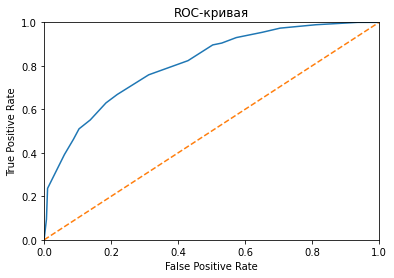

0.8084030245869124

In [68]:
tree_upsamp = DecisionTreeClassifier(random_state=12345, max_depth=45,
                                min_samples_leaf=3, max_features=0.8, min_samples_split=0.1)
tree_upsamp.fit(features_upsampled, target_upsampled )
probabilities_valid_dec_ups = tree_upsamp.predict_proba(features_valid)[:,1]
auc_roc_dec_up = roc_auc_score(target_valid,probabilities_valid_dec_ups)

fpr_dec_up, tpr_dec_up, thresholds_down_up = roc_curve(target_valid, probabilities_valid_dec_ups)

plt.figure()
plt.plot(fpr_dec_up, tpr_dec_up)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()


auc_roc_dec_up

 ##### `roc-auc =  0.81`

### Downsample

In [69]:
dec_up_down(features_downsampled, target_downsampled)

({'min_samples_split': 0.1,
  'min_samples_leaf': 3,
  'max_features': 0.8,
  'max_depth': 45},)

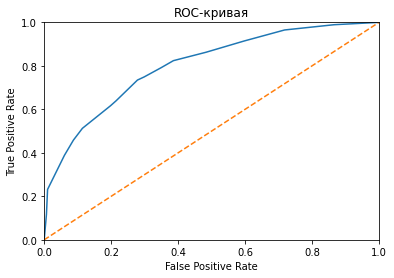

0.8008982278317047

In [70]:
tree_down = DecisionTreeClassifier(random_state=12345, max_depth=45,
                                min_samples_leaf=3, max_features=0.8, min_samples_split=0.1)
tree_down.fit(features_downsampled, target_downsampled)
probabilities_valid_dec_down = tree_down.predict_proba(features_valid)[:,1]
auc_roc_dec_down = roc_auc_score(target_valid,probabilities_valid_dec_down)

fpr_dec_down, tpr_dec_down, thresholds_down = roc_curve(target_valid, probabilities_valid_dec_down)

plt.figure()
plt.plot(fpr_dec_down, tpr_dec_down)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()


auc_roc_dec_down

 ##### `roc-auc =  0.80`

### Random Forest

#### Balanced 

In [71]:
clf = RandomForestClassifier(class_weight = 'balanced',random_state=12345)   
parametrs = { 'n_estimators': range (10, 120, 10),
        'max_depth': range (1, 50, 1)}
forest_bal = RandomizedSearchCV(clf, n_jobs=4, n_iter=100,cv=5,
                                 param_distributions=parametrs, random_state=12345, scoring='roc_auc')
forest_bal.fit(features_train, target_train)
print(forest_bal.best_params_)

{'n_estimators': 50, 'max_depth': 7}


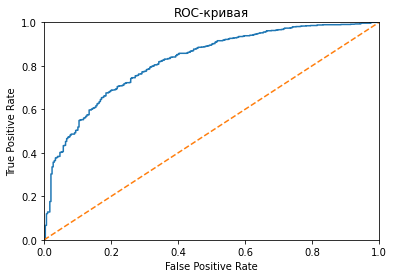

0.8226961407372027

In [72]:
forest_bal = RandomForestClassifier(class_weight = 'balanced',random_state=12345,n_estimators=110, max_depth=8 )   
forest_bal.fit(features_train, target_train)

probabilities_valid_for = forest_bal.predict_proba(features_valid)[:,1]
auc_roc_dec_for = roc_auc_score(target_valid,probabilities_valid_for)

fpr_dec_for, tpr_dec_for, thresholds_for = roc_curve(target_valid, probabilities_valid_for)

plt.figure()
plt.plot(fpr_dec_for, tpr_dec_for)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()


auc_roc_dec_for

 #####  `roc-auc =  0.82`

#### Upsample

In [73]:
def random_forest_up_down(features, target):
    
    find = RandomForestClassifier(random_state=12345)   
    parametrs = { 'n_estimators': range (10, 120, 10),
        'max_depth': range (1, 50, 1),
       'min_samples_leaf': range(2, 10, 1),
       }
    forest = RandomizedSearchCV(find, n_jobs=4, n_iter=50,cv=5,
                                 param_distributions=parametrs, random_state=12345, scoring='roc_auc')
    forest.fit(features, target)
    return forest.best_params_ 

In [74]:
random_forest_up_down(features_upsampled, target_upsampled)

{'n_estimators': 110, 'min_samples_leaf': 2, 'max_depth': 36}

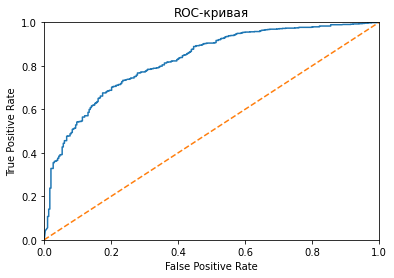

0.8253009609701993

In [75]:
forest_up = RandomForestClassifier(random_state=12345,n_estimators=110, max_depth= 36,min_samples_leaf=2)   
forest_up.fit(features_upsampled, target_upsampled)

probabilities_valid_for_up = forest_up.predict_proba(features_valid)[:,1]
auc_roc_dec_for_up = roc_auc_score(target_valid,probabilities_valid_for_up)

fpr_dec_for_up, tpr_dec_for_up, thresholds_for_up = roc_curve(target_valid, probabilities_valid_for_up)

plt.figure()
plt.plot(fpr_dec_for_up, tpr_dec_for_up)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()


auc_roc_dec_for_up

 #####  `roc-auc =  0.82`

### Downsample

In [76]:
random_forest_up_down(features_downsampled, target_downsampled)

{'n_estimators': 60, 'min_samples_leaf': 7, 'max_depth': 7}

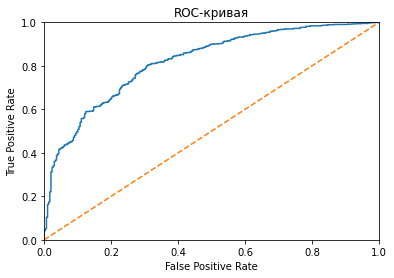

0.8193991305122206

In [77]:
model_for_down = RandomForestClassifier(random_state=12345,n_estimators=80, max_depth=16,min_samples_leaf = 7)
model_for_down.fit(features_downsampled, target_downsampled)

probabilities_valid_for_down = model_for_down.predict_proba(features_valid)[:,1]
auc_roc_for_down = roc_auc_score(target_valid,probabilities_valid_for_down)

fpr_dec_for_down, tpr_dec_for_down, thresholds_for_down = roc_curve(target_valid, probabilities_valid_for_down)

plt.figure()
plt.plot(fpr_dec_for_down, tpr_dec_for_down)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()


auc_roc_for_down

 ##### `roc-auc =  0.82`

## Lightgbm

### Balanced

In [78]:
lgbm = lgb.LGBMClassifier(class_weight='balanced')

params = {'learning_rate': [0.05,2,3],
          'boosting_type' : ['gbdt'],
          'n_estimators': [40, 60, 80, 100],
          'num_leaves': [4, 6, 8, 12],
          'colsample_bytree': [0.9],
          'subsample': [0.9],
         'max_depth':[20,40,60,80]}



lgbm_first = RandomizedSearchCV(lgbm, n_jobs=4, n_iter=50,cv=5,
                                 param_distributions=params, random_state=12345, scoring='roc_auc')

lgbm_first.fit(X=features_train, y=target_train)

lgbm_first.best_params_,lgbm_first.best_score_

({'subsample': 0.9,
  'num_leaves': 12,
  'n_estimators': 100,
  'max_depth': 60,
  'learning_rate': 0.05,
  'colsample_bytree': 0.9,
  'boosting_type': 'gbdt'},
 0.8869229692672238)

[1]	valid_0's binary_logloss: 0.678964
[2]	valid_0's binary_logloss: 0.666232
[3]	valid_0's binary_logloss: 0.654849
[4]	valid_0's binary_logloss: 0.644689
[5]	valid_0's binary_logloss: 0.635469
[6]	valid_0's binary_logloss: 0.627754
[7]	valid_0's binary_logloss: 0.620335
[8]	valid_0's binary_logloss: 0.613126
[9]	valid_0's binary_logloss: 0.60673
[10]	valid_0's binary_logloss: 0.601451
[11]	valid_0's binary_logloss: 0.595496
[12]	valid_0's binary_logloss: 0.590279
[13]	valid_0's binary_logloss: 0.585708
[14]	valid_0's binary_logloss: 0.581337
[15]	valid_0's binary_logloss: 0.577048
[16]	valid_0's binary_logloss: 0.572905
[17]	valid_0's binary_logloss: 0.569648
[18]	valid_0's binary_logloss: 0.566495
[19]	valid_0's binary_logloss: 0.563759
[20]	valid_0's binary_logloss: 0.560616
[21]	valid_0's binary_logloss: 0.558133
[22]	valid_0's binary_logloss: 0.555683
[23]	valid_0's binary_logloss: 0.553028
[24]	valid_0's binary_logloss: 0.551182
[25]	valid_0's binary_logloss: 0.549038
[26]	valid

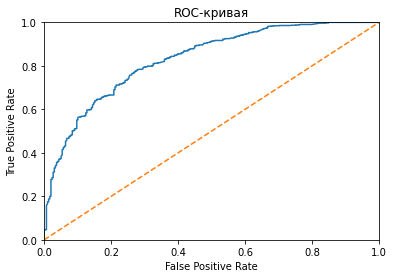

CPU times: user 617 ms, sys: 44 ms, total: 661 ms
Wall time: 352 ms


0.8307453793282114

In [79]:
%%time
lgbm_bal = lgb.LGBMClassifier(class_weight='balanced',subsample= 0.9,num_leaves= 6,n_estimators=100,
                              learning_rate=0.05,colsample_bytree=0.9,max_depth= 80,boosting_type='gbdt')



lgbm_bal.fit(X=features_train, y=target_train,
        eval_set=[(features_valid,target_valid)])

probabilities_valid_ligh = lgbm_bal.predict_proba(features_valid)[:,1]
auc_roc_ligh = roc_auc_score(target_valid,probabilities_valid_ligh)

fpr_dec_ligh, tpr_dec_ligh, thresholds_ligh = roc_curve(target_valid, probabilities_valid_ligh)

plt.figure()
plt.plot(fpr_dec_ligh, tpr_dec_ligh)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()


auc_roc_ligh

 #####  `roc-auc =  0.83`

### Upsample

In [80]:
lgbm_up = lgb.LGBMClassifier()

params = {'learning_rate': [0.05,2,3],
          'boosting_type' : ['gbdt'],
          'n_estimators': [40, 60, 80, 100],
          'num_leaves': [4, 6, 8, 12],
          'colsample_bytree': [0.9],
          'subsample': [0.9],
         'max_depth':[20,40,60,80]}



lgbm_first_up = RandomizedSearchCV(lgbm, n_jobs=4, n_iter=50,cv=5,
                                 param_distributions=params, random_state=12345, scoring='roc_auc')

lgbm_first_up.fit(X=features_upsampled, y=target_upsampled)

lgbm_first_up.best_params_,lgbm_first_up.best_score_

({'subsample': 0.9,
  'num_leaves': 12,
  'n_estimators': 100,
  'max_depth': 60,
  'learning_rate': 0.05,
  'colsample_bytree': 0.9,
  'boosting_type': 'gbdt'},
 0.9023491210879669)

[1]	valid_0's binary_logloss: 0.563385
[2]	valid_0's binary_logloss: 0.551166
[3]	valid_0's binary_logloss: 0.540485
[4]	valid_0's binary_logloss: 0.530832
[5]	valid_0's binary_logloss: 0.522155
[6]	valid_0's binary_logloss: 0.515254
[7]	valid_0's binary_logloss: 0.508165
[8]	valid_0's binary_logloss: 0.501828
[9]	valid_0's binary_logloss: 0.495605
[10]	valid_0's binary_logloss: 0.490835
[11]	valid_0's binary_logloss: 0.485248
[12]	valid_0's binary_logloss: 0.48031
[13]	valid_0's binary_logloss: 0.475657
[14]	valid_0's binary_logloss: 0.471557
[15]	valid_0's binary_logloss: 0.467775
[16]	valid_0's binary_logloss: 0.464262
[17]	valid_0's binary_logloss: 0.461016
[18]	valid_0's binary_logloss: 0.458191
[19]	valid_0's binary_logloss: 0.455537
[20]	valid_0's binary_logloss: 0.453002
[21]	valid_0's binary_logloss: 0.450478
[22]	valid_0's binary_logloss: 0.448487
[23]	valid_0's binary_logloss: 0.446369
[24]	valid_0's binary_logloss: 0.444379
[25]	valid_0's binary_logloss: 0.442696
[26]	valid

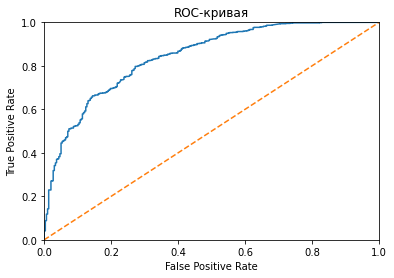

CPU times: user 721 ms, sys: 43.3 ms, total: 764 ms
Wall time: 378 ms


0.8429963326074109

In [81]:
%%time
lgbm_ups = lgb.LGBMClassifier(subsample= 0.9,num_leaves= 12,n_estimators=100,
                              learning_rate=0.05,colsample_bytree=0.9,max_depth= 60,boosting_type='gbdt')



lgbm_ups.fit(X=features_train, y=target_train,
        eval_set=[(features_valid,target_valid)])

probabilities_valid_ligh_up = lgbm_ups.predict_proba(features_valid)[:,1]
auc_roc_ligh_up = roc_auc_score(target_valid,probabilities_valid_ligh_up)

fprligh_up, tpr_ligh_up, thresholds_ligh_up = roc_curve(target_valid, probabilities_valid_ligh_up)

plt.figure()
plt.plot(fprligh_up, tpr_ligh_up)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()


auc_roc_ligh_up

 #####  `roc-auc = 0.84`

### Downsample

In [82]:
lgbm_down = lgb.LGBMClassifier()

params = {'learning_rate': [0.05,2,3],
          'boosting_type' : ['gbdt'],
          'n_estimators': [40, 60, 80, 100],
          'num_leaves': [4, 6, 8, 12],
          'colsample_bytree': [0.9],
          'subsample': [0.9],
         'max_depth':[20,40,60,80]}



lgbm_first_down = RandomizedSearchCV(lgbm_down, n_jobs=4,cv=5, n_iter=50,
                                 param_distributions=params, random_state=12345, scoring='roc_auc')

lgbm_first_down.fit(X=features_downsampled, y=target_downsampled)

lgbm_first_down.best_params_,lgbm_first_down.best_score_

({'subsample': 0.9,
  'num_leaves': 12,
  'n_estimators': 100,
  'max_depth': 60,
  'learning_rate': 0.05,
  'colsample_bytree': 0.9,
  'boosting_type': 'gbdt'},
 0.8794264048138372)

[1]	valid_0's binary_logloss: 0.685237
[2]	valid_0's binary_logloss: 0.672375
[3]	valid_0's binary_logloss: 0.660836
[4]	valid_0's binary_logloss: 0.650692
[5]	valid_0's binary_logloss: 0.641511
[6]	valid_0's binary_logloss: 0.633518
[7]	valid_0's binary_logloss: 0.626314
[8]	valid_0's binary_logloss: 0.618924
[9]	valid_0's binary_logloss: 0.612418
[10]	valid_0's binary_logloss: 0.606786
[11]	valid_0's binary_logloss: 0.601126
[12]	valid_0's binary_logloss: 0.596138
[13]	valid_0's binary_logloss: 0.591326
[14]	valid_0's binary_logloss: 0.587275
[15]	valid_0's binary_logloss: 0.583278
[16]	valid_0's binary_logloss: 0.579586
[17]	valid_0's binary_logloss: 0.576181
[18]	valid_0's binary_logloss: 0.572642
[19]	valid_0's binary_logloss: 0.569772
[20]	valid_0's binary_logloss: 0.566855
[21]	valid_0's binary_logloss: 0.564131
[22]	valid_0's binary_logloss: 0.561702
[23]	valid_0's binary_logloss: 0.559563
[24]	valid_0's binary_logloss: 0.55725
[25]	valid_0's binary_logloss: 0.555569
[26]	valid

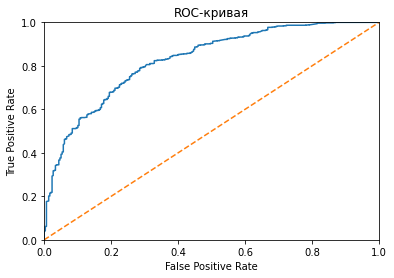

CPU times: user 562 ms, sys: 75.3 ms, total: 637 ms
Wall time: 350 ms


0.8429963326074109

In [83]:
%%time
lgbm_downs = lgb.LGBMClassifier(subsample= 0.9,num_leaves= 6,n_estimators=100,
                              learning_rate=0.05,colsample_bytree=0.9,max_depth= 80,boosting_type='gbdt')



lgbm_downs.fit(X=features_downsampled, y=target_downsampled,
        eval_set=[(features_valid,target_valid)])

probabilities_valid_ligh_down = lgbm_downs.predict_proba(features_valid)[:,1]
auc_roc_ligh_down = roc_auc_score(target_valid,probabilities_valid_ligh_up)

fprligh_down, tpr_ligh_down, thresholds_ligh_down = roc_curve(target_valid, probabilities_valid_ligh_down)

plt.figure()
plt.plot(fprligh_down, tpr_ligh_down)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()


auc_roc_ligh_down


 ##### `roc-auc =  0.84`

### Xgboosting

#### Balanced

In [84]:
# Preconfigure estimator and parameters
estimator = XGBClassifier()
params = {  'scale_pos_weight' : [0.36],
            "n_estimators": st.randint(3, 40),
            "max_depth": st.randint(3, 40),
            "learning_rate": st.uniform(0.05, 0.4),
            'objective': ['binary:logistic']}

clf = RandomizedSearchCV(estimator, params, cv=5,random_state=12345,
                         n_jobs=1, n_iter=50,scoring='roc_auc') 
                              
clf.fit(features_train,target_train)  
clf.best_params_

{'learning_rate': 0.4223262770998448,
 'max_depth': 8,
 'n_estimators': 18,
 'objective': 'binary:logistic',
 'scale_pos_weight': 0.36}

In [85]:
df['target'].value_counts()

1    5174
0    1869
Name: target, dtype: int64

In [86]:
total_negative_examples = 1869
total_positive_examples = 5174

In [87]:
scale_pos_weight = total_negative_examples / total_positive_examples
scale_pos_weight

0.36122922303826827

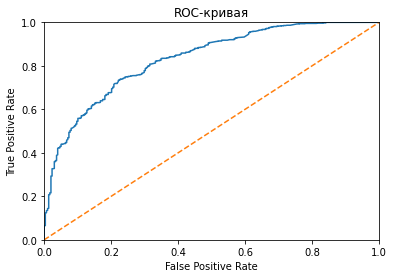

0.8320143943135176

In [88]:
xg= XGBClassifier(learning_rate= 0.3, max_depth= 3, n_estimators =29,random_state=12345, scale_pos_weight=0.36)

xg.fit(features_train,target_train)
probabilities_valid_xgb = xg.predict_proba(features_valid)[:,1]
auc_roc_xg = roc_auc_score(target_valid,probabilities_valid_xgb)

fprligh_xg, tpr_ligh_xg, thresholds_ligh_xg = roc_curve(target_valid,probabilities_valid_xgb)

plt.figure()
plt.plot(fprligh_xg, tpr_ligh_xg)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()


auc_roc_xg

 ##### `roc-auc =  0.83`


#### Upsample

In [89]:
def xgb_up_down(features,target):
    estimator = XGBClassifier()
    params = { 
            "n_estimators": st.randint(3, 40),
            "max_depth": st.randint(3, 40),
            "learning_rate": st.uniform(0.05, 0.4),
            'objective': ['binary:logistic']}

    clf = RandomizedSearchCV(estimator, params, cv=5,random_state=12345,
                         n_jobs=1, n_iter=50,scoring='roc_auc') 
                              
    clf.fit(features,target)  
    return clf.best_params_

In [90]:
xgb_up_down(features_upsampled,target_upsampled)

{'learning_rate': 0.43252399255190643,
 'max_depth': 17,
 'n_estimators': 30,
 'objective': 'binary:logistic'}

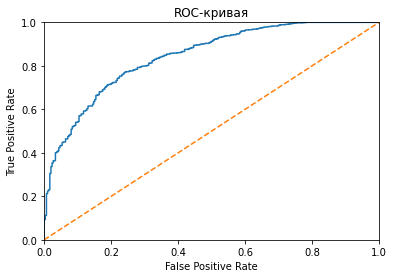

0.8438322228608901

In [91]:
xg_up= XGBClassifier(learning_rate= 0.35, max_depth= 27, n_estimators =33,random_state=12345)

xg_up.fit(features_upsampled,target_upsampled)
probabilities_valid_xgb_up = xg_up.predict_proba(features_valid)[:,1]
auc_roc_xg_up = roc_auc_score(target_valid,probabilities_valid_xgb_up)

fpr_xg_up, tpr_xg_up, thresholds_xg_up = roc_curve(target_valid,probabilities_valid_xgb_up)

plt.figure()
plt.plot(fpr_xg_up, tpr_xg_up)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()


auc_roc_xg_up

 ##### `roc-auc =  0.85`


### Downsample

In [92]:
xgb_up_down(features_downsampled, target_downsampled)

{'learning_rate': 0.24816590350298573,
 'max_depth': 4,
 'n_estimators': 28,
 'objective': 'binary:logistic'}

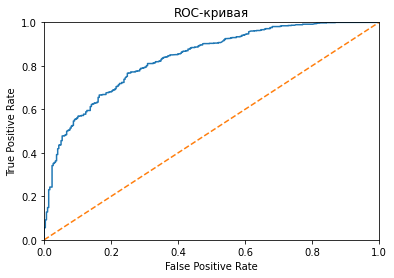

0.8354308174318537

In [93]:
xg_down= XGBClassifier(learning_rate= 0.25, max_depth=4, n_estimators =28,random_state=12345)

xg_down.fit(features_downsampled, target_downsampled)
probabilities_valid_xg_down = xg_down.predict_proba(features_valid)[:,1]
auc_roc_xg_down = roc_auc_score(target_valid,probabilities_valid_xg_down)

fpr_xg_down, tpr_xg_down, thresholds_xg_down = roc_curve(target_valid,probabilities_valid_xg_down)

plt.figure()
plt.plot(fpr_xg_down, tpr_xg_down)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()


auc_roc_xg_down

 #####  `roc-auc =  0.835`

### Catboost

In [94]:
features_train.head()

,MonthlyCharges,SeniorCitizen,contract_time,Type_One year,Type_Two year,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_Yes
618,0.757465,0,1.005272,0,0,1,0,1,1,0,1,0,0,0,0,0,1
6778,-1.496570,0,1.617418,0,1,0,1,0,0,0,0,0,0,0,0,1,0
1839,-1.312058,0,-1.170945,0,1,0,1,0,0,0,0,0,0,0,0,0,1
5291,0.720895,0,1.455617,1,0,1,0,0,1,1,0,0,0,0,1,0,1
3487,-1.484934,0,0.798977,0,1,0,1,0,0,0,0,0,0,0,1,1,0


In [95]:
features_train.columns

Index(['MonthlyCharges', 'SeniorCitizen', 'contract_time', 'Type_One year',
       'Type_Two year', 'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'MultipleLines_Yes'],
      dtype='object')

In [96]:
cat_categorical = ['Type_One year', 'Type_Two year',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'MultipleLines_Yes']

#### Balanced

0:	learn: 0.6069687	test: 0.6148388	best: 0.6148388 (0)	total: 77.6ms	remaining: 1m 17s
100:	learn: 0.2906578	test: 0.3685602	best: 0.3685602 (100)	total: 368ms	remaining: 3.28s
200:	learn: 0.2338770	test: 0.3326677	best: 0.3325077 (186)	total: 621ms	remaining: 2.47s
300:	learn: 0.2001305	test: 0.3175218	best: 0.3168779 (290)	total: 874ms	remaining: 2.03s
400:	learn: 0.1760297	test: 0.3039828	best: 0.3037545 (395)	total: 1.14s	remaining: 1.7s
500:	learn: 0.1559969	test: 0.3061393	best: 0.3015304 (433)	total: 1.38s	remaining: 1.37s
600:	learn: 0.1395846	test: 0.3049760	best: 0.3015304 (433)	total: 1.68s	remaining: 1.11s
700:	learn: 0.1279207	test: 0.3053334	best: 0.3015304 (433)	total: 1.95s	remaining: 830ms
800:	learn: 0.1175551	test: 0.3079975	best: 0.3015304 (433)	total: 2.19s	remaining: 544ms
900:	learn: 0.1075276	test: 0.3097501	best: 0.3015304 (433)	total: 2.45s	remaining: 269ms
999:	learn: 0.0991487	test: 0.3163656	best: 0.3015304 (433)	total: 2.72s	remaining: 0us

bestTest = 0.3

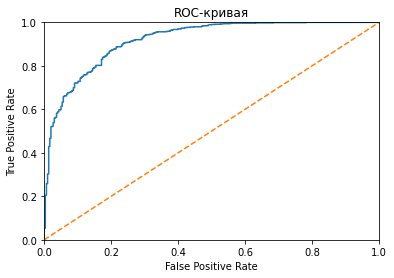

0.9188053043612017

In [97]:
cat_new = CatBoostClassifier(learning_rate= 0.15, max_depth= 4,random_state = 12345,l2_leaf_reg=1)

cat_new.fit(features_train,target_train,cat_features=cat_categorical, eval_set=[(features_valid,target_valid)],
             verbose=100)


probabilities_valid_cat = cat_new.predict_proba(features_valid)[:,1]
auc_roc_cat = roc_auc_score(target_valid,probabilities_valid_cat)

fpr_cat, tpr_cat, thresholds_cat = roc_curve(target_valid,probabilities_valid_cat)

plt.figure()
plt.plot(fpr_cat, tpr_cat)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()


auc_roc_cat

 #####  `roc-auc =  0.91`

#### Upsample

In [98]:
def cat_up_down(features,target):
    cat = CatBoostClassifier()

    params = {'depth': [4, 6, 10],
          'learning_rate' : [0.05, 0.1, 0.15],
        'l2_leaf_reg': [1,4,9]
#          'iterations': [1200],
#           'early_stopping_rounds':[1000],
# 
          
         }
    cat_model = RandomizedSearchCV(cat, params, cv=5,random_state=12345,
                         n_jobs=1, n_iter=50,scoring='roc_auc') 
                              
    cat_model.fit(features,target,cat_features=cat_categorical, eval_set=[(features_valid,target_valid)],
             verbose=100)  
    return cat_model.best_params_

0:	learn: 0.6458819	test: 0.6526271	best: 0.6526271 (0)	total: 10.3ms	remaining: 10.3s
100:	learn: 0.3217894	test: 0.4799474	best: 0.4799474 (100)	total: 400ms	remaining: 3.56s
200:	learn: 0.2372333	test: 0.4299326	best: 0.4299326 (200)	total: 829ms	remaining: 3.29s
300:	learn: 0.1832476	test: 0.4044436	best: 0.4042375 (295)	total: 1.23s	remaining: 2.86s
400:	learn: 0.1489899	test: 0.3911714	best: 0.3903406 (387)	total: 1.63s	remaining: 2.44s
500:	learn: 0.1255813	test: 0.3873347	best: 0.3873347 (500)	total: 2.05s	remaining: 2.04s
600:	learn: 0.1062328	test: 0.3880536	best: 0.3835259 (560)	total: 2.45s	remaining: 1.63s
700:	learn: 0.0907367	test: 0.3905218	best: 0.3835259 (560)	total: 2.84s	remaining: 1.21s
800:	learn: 0.0788009	test: 0.3949717	best: 0.3835259 (560)	total: 3.23s	remaining: 804ms
900:	learn: 0.0684727	test: 0.4008772	best: 0.3835259 (560)	total: 3.63s	remaining: 398ms
999:	learn: 0.0604678	test: 0.4078417	best: 0.3835259 (560)	total: 4.02s	remaining: 0us

bestTest = 0.3

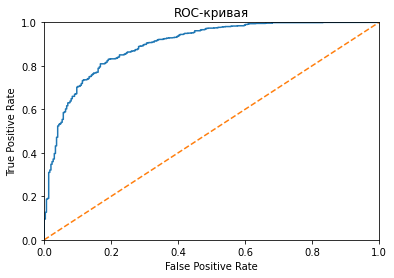

0.8966552246176763

In [99]:
cat_up = CatBoostClassifier(learning_rate= 0.1, max_depth= 6,random_state = 12345,l2_leaf_reg=1)

cat_up.fit(features_upsampled,target_upsampled,cat_features=cat_categorical, eval_set=[(features_valid,target_valid)],
             verbose=100)


probabilities_valid_cat_up = cat_up.predict_proba(features_valid)[:,1]
auc_roc_cat_up = roc_auc_score(target_valid,probabilities_valid_cat_up)

fpr_cat_up, tpr_cat_up, thresholds_cat_up = roc_curve(target_valid,probabilities_valid_cat_up)

plt.figure()
plt.plot(fpr_cat_up, tpr_cat_up)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()


auc_roc_cat_up

 #####  `roc-auc =  0.89`

#### Downsample

0:	learn: 0.6295568	test: 0.6379444	best: 0.6379444 (0)	total: 4.4ms	remaining: 4.39s
100:	learn: 0.3321228	test: 0.4944468	best: 0.4944468 (100)	total: 378ms	remaining: 3.36s
200:	learn: 0.2558792	test: 0.4717186	best: 0.4714051 (199)	total: 529ms	remaining: 2.1s
300:	learn: 0.2110628	test: 0.4682030	best: 0.4662224 (221)	total: 733ms	remaining: 1.7s
400:	learn: 0.1761214	test: 0.4770653	best: 0.4662224 (221)	total: 997ms	remaining: 1.49s
500:	learn: 0.1476750	test: 0.4782144	best: 0.4662224 (221)	total: 1.28s	remaining: 1.28s
600:	learn: 0.1267406	test: 0.4888137	best: 0.4662224 (221)	total: 1.43s	remaining: 953ms
700:	learn: 0.1099449	test: 0.4966869	best: 0.4662224 (221)	total: 1.61s	remaining: 688ms
800:	learn: 0.0972058	test: 0.5035860	best: 0.4662224 (221)	total: 1.76s	remaining: 439ms
900:	learn: 0.0856889	test: 0.5139989	best: 0.4662224 (221)	total: 1.94s	remaining: 213ms
999:	learn: 0.0769073	test: 0.5226974	best: 0.4662224 (221)	total: 2.09s	remaining: 0us

bestTest = 0.4662

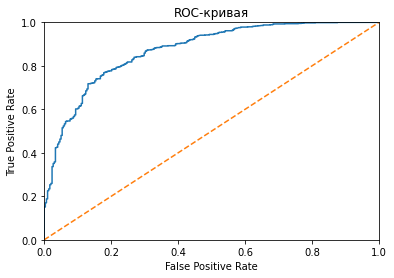

0.8716614988544458

In [100]:
cat_down = CatBoostClassifier(learning_rate= 0.15, max_depth= 4,random_state = 12345,l2_leaf_reg=1)

cat_down.fit(features_downsampled, target_downsampled,cat_features=cat_categorical, eval_set=[(features_valid,target_valid)],
             verbose=100)


probabilities_valid_cat_down = cat_down.predict_proba(features_valid)[:,1]
auc_roc_cat_down = roc_auc_score(target_valid,probabilities_valid_cat_down)

fpr_cat_down, tpr_cat_down, thresholds_cat_down = roc_curve(target_valid,probabilities_valid_cat_down)

plt.figure()
plt.plot(fpr_cat_down, tpr_cat_down)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()


auc_roc_cat_down

 ##### Посчитаем `roc-auc =  0.86'

<a id="3"></a>

### Testing models

Let's using a full sample for training: train+valid.

In [101]:
features_all = pd.concat([features_train,features_valid])
target_all = pd.concat([target_train,target_valid])

Let's consider the best variant for each model.

#### LogicalRegression

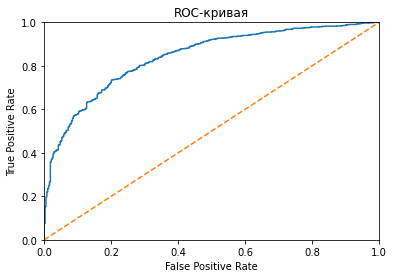

0.8410085303686248

In [102]:
model_log_balance_test = LogisticRegression(random_state=12345, solver='liblinear', class_weight ='balanced')

model_log_balance_test.fit(features_all, target_all)
probabilities_test = model_log_balance_test.predict_proba(features_test)[:,1]
auc_roc_log_test = roc_auc_score(target_test,probabilities_test)

fpr_log_test, tpr_log_test, thresholds_log_test = roc_curve(target_test, probabilities_test)

plt.figure()
plt.plot(fpr_log_test, tpr_log_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()
auc_roc_log_test

 #####  `roc-auc =  0.84`

### DecisionTree

In [103]:
features_downsampled_all, target_downsampled_all = downsampl(features_all, target_all,0.3)

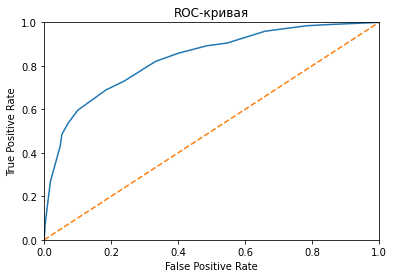

0.8334234188077978

In [104]:
tree_down_test = DecisionTreeClassifier(random_state=12345, max_depth=45,
                                min_samples_leaf=3, max_features=0.8, min_samples_split=0.1)
tree_down_test.fit(features_downsampled_all, target_downsampled_all)
probabilities_test_dec = tree_down_test.predict_proba(features_test)[:,1]
auc_roc_dec_test = roc_auc_score(target_test,probabilities_test_dec)

fpr_dec_test, tpr_dec_test, thresholds_test = roc_curve(target_test, probabilities_test_dec)

plt.figure()
plt.plot(fpr_dec_test, tpr_dec_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()


auc_roc_dec_test

 ##### `roc-auc =  0.83`

### RandomForest

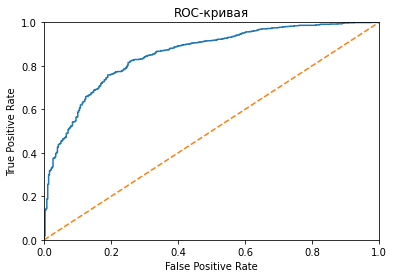

0.8542190742116453

In [105]:
forest_test = RandomForestClassifier(class_weight = 'balanced',random_state=12345,n_estimators=110, max_depth=8 )   
forest_test.fit(features_all, target_all)

probabilities_test_for = forest_test.predict_proba(features_test)[:,1]
auc_roc_for_test = roc_auc_score(target_test,probabilities_test_for)

fpr_for_test, tpr_for_test, thresholds_for_test = roc_curve(target_test, probabilities_test_for)

plt.figure()
plt.plot(fpr_for_test, tpr_for_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()


auc_roc_for_test

 #### `roc-auc =  0.86`

### LightGbm

In [106]:
features_upsampled_all, target_upsampled_all = upsamp(features_all, target_all,3)

In [107]:
target_upsampled_all.value_counts()

0    4470
1    4144
Name: target, dtype: int64

[1]	valid_0's binary_logloss: 0.692737
[2]	valid_0's binary_logloss: 0.675993
[3]	valid_0's binary_logloss: 0.660758
[4]	valid_0's binary_logloss: 0.647286
[5]	valid_0's binary_logloss: 0.63494
[6]	valid_0's binary_logloss: 0.624757
[7]	valid_0's binary_logloss: 0.613517
[8]	valid_0's binary_logloss: 0.603238
[9]	valid_0's binary_logloss: 0.594738
[10]	valid_0's binary_logloss: 0.587442
[11]	valid_0's binary_logloss: 0.579629
[12]	valid_0's binary_logloss: 0.572233
[13]	valid_0's binary_logloss: 0.565544
[14]	valid_0's binary_logloss: 0.559201
[15]	valid_0's binary_logloss: 0.552972
[16]	valid_0's binary_logloss: 0.547037
[17]	valid_0's binary_logloss: 0.541939
[18]	valid_0's binary_logloss: 0.536863
[19]	valid_0's binary_logloss: 0.532752
[20]	valid_0's binary_logloss: 0.528261
[21]	valid_0's binary_logloss: 0.524159
[22]	valid_0's binary_logloss: 0.520849
[23]	valid_0's binary_logloss: 0.517071
[24]	valid_0's binary_logloss: 0.513953
[25]	valid_0's binary_logloss: 0.511262
[26]	valid

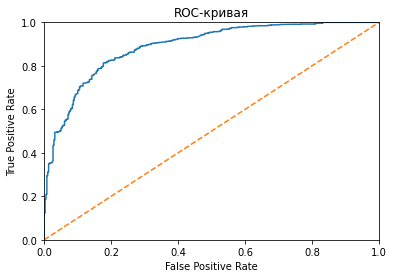

CPU times: user 629 ms, sys: 27.8 ms, total: 656 ms
Wall time: 287 ms


0.889097522862925

In [108]:
%%time
lgbm_test = lgb.LGBMClassifier(subsample= 0.9,num_leaves= 12,n_estimators=100,
                              learning_rate=0.05,colsample_bytree=0.9,max_depth= 60,boosting_type='gbdt')



lgbm_test.fit(X=features_upsampled_all, y=target_upsampled_all,
        eval_set=[(features_test,target_test)])

probabilities_lgb_test = lgbm_test.predict_proba(features_test)[:,1]
auc_roc_lgb_test = roc_auc_score(target_test,probabilities_lgb_test)

fpr_lgb_test, tpr_lgb_test, thresholds_lgb_test = roc_curve(target_test, probabilities_lgb_test)

plt.figure()
plt.plot(fpr_lgb_test, tpr_lgb_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()


auc_roc_lgb_test

 #####  `roc-auc =  0.89`

### Xgboost

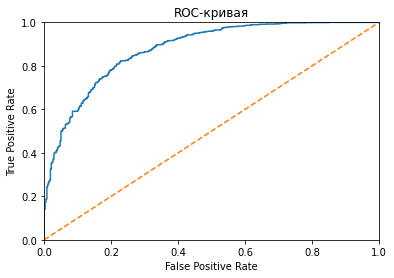

0.8775584701693264

In [109]:
xg_test= XGBClassifier(learning_rate= 0.35, max_depth= 27, n_estimators =33,random_state=12345)

xg_test.fit(features_upsampled_all, target_upsampled_all)
probabilities_xg_test = xg_test.predict_proba(features_test)[:,1]
auc_roc_xg_test = roc_auc_score(target_test,probabilities_xg_test)

fpr_xg_test, tpr_xg_test, thresholds_xg_test = roc_curve(target_test,probabilities_xg_test)

plt.figure()
plt.plot(fpr_xg_test, tpr_xg_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()


auc_roc_xg_test

 #####  `roc-auc =  0.873`

### Catboost

0:	learn: 0.6146890	test: 0.6152571	best: 0.6152571 (0)	total: 3.89ms	remaining: 3.89s
100:	learn: 0.3062818	test: 0.3503859	best: 0.3503859 (100)	total: 303ms	remaining: 2.7s
200:	learn: 0.2461043	test: 0.3038200	best: 0.3038200 (200)	total: 599ms	remaining: 2.38s
300:	learn: 0.2122941	test: 0.2857084	best: 0.2841526 (292)	total: 921ms	remaining: 2.14s
400:	learn: 0.1901371	test: 0.2773121	best: 0.2766974 (393)	total: 1.21s	remaining: 1.81s
500:	learn: 0.1732068	test: 0.2767857	best: 0.2761828 (496)	total: 1.5s	remaining: 1.5s
600:	learn: 0.1572407	test: 0.2760914	best: 0.2758546 (521)	total: 1.8s	remaining: 1.2s
700:	learn: 0.1447185	test: 0.2724917	best: 0.2722406 (698)	total: 2.09s	remaining: 893ms
800:	learn: 0.1348700	test: 0.2750897	best: 0.2714948 (711)	total: 2.38s	remaining: 592ms
900:	learn: 0.1252150	test: 0.2786010	best: 0.2714948 (711)	total: 2.67s	remaining: 294ms
999:	learn: 0.1166138	test: 0.2815128	best: 0.2714948 (711)	total: 2.98s	remaining: 0us

bestTest = 0.271494

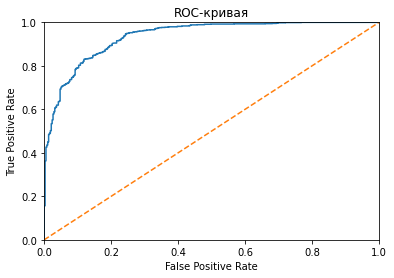

0.9361938673566104

In [110]:
cat_new_test = CatBoostClassifier(learning_rate= 0.15, max_depth= 4,random_state = 12345,l2_leaf_reg=1)

cat_new_test.fit(features_all, target_all,cat_features=cat_categorical, eval_set=[(features_test,target_test)],
             verbose=100)


probabilities_cat_test = cat_new_test.predict_proba(features_test)[:,1]
auc_roc_catnew_test = roc_auc_score(target_test,probabilities_cat_test)

fpr_cat_new_test, tpr_cat_new_test, thresholds_cat_new_test = roc_curve(target_test,probabilities_cat_test)

plt.figure()
plt.plot(fpr_cat_new_test, tpr_cat_new_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()


auc_roc_catnew_test

 #####  `roc-auc =  0.94`


In [111]:
name = ['LogReg','DecTree','Forest','Lightgbm','XgBoost','Catboost']

score = [0.84,0.83,0.85,0.89,0.88,0.94]

In [112]:
data=pd.DataFrame({'Roc_Auc':score, 'Models' : name})


In [113]:
data = data.sort_values(by='Roc_Auc')

In [114]:
data

,Roc_Auc,Models
1,0.83,DecTree
0,0.84,LogReg
2,0.85,Forest
4,0.88,XgBoost
3,0.89,Lightgbm
5,0.94,Catboost


In [120]:
fig = px.bar(data, y='Roc_Auc',x = 'Models',color="Roc_Auc", title="Models Scores",)
fig.show()

In [124]:
from IPython.display import Image
newplot('img/picture.png')

NameError: name 'newplot' is not defined

In [116]:
importances = cat_new_test.feature_importances_
importances

array([14.228768  ,  0.86673972, 67.83100509,  1.6110731 ,  4.08896321,
        2.81279631,  0.90261872,  0.74454587,  0.56993534,  0.55685315,
        0.97638843,  0.84499901,  0.85429382,  0.75724326,  0.81859508,
        0.91434819,  0.62083369])

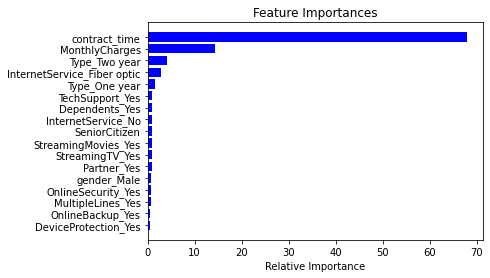

In [117]:
importances = cat_new_test.feature_importances_
indices = np.argsort(importances)
features=features_all.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

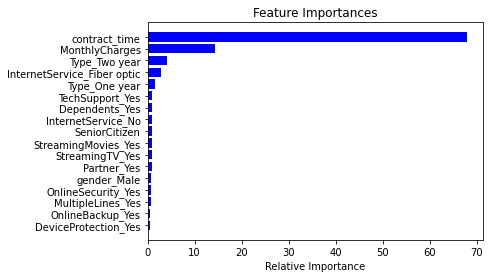

According to the graph, the most influential features are 'contract_time', 'Monthly Charges', 'Type One year', 'Type_Two year' и 'Internet Service Fiber optic'.

<a id="4"></a>

### Conclusion


#### According to the graph, CatBoost model reached the most 'roc_auc' = 0.94.
'LogReg' and 'Decree' display the smallest values 'roc_auc' = 0.83 and 'roc_auc' = 0.83.In addition, customer churn is the most  influenced  by 5 features: 'contract_time', 'Monthly Charges', 'Type One year', 'Type_Two year' и 'Internet Service Fiber optic'. According to this,highly recommend the business to focus on them.